In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer  

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

# Get data

In [2]:
data=pd.read_csv(r'crypto_2021-13-15.csv', index_col=False)
data = data.drop(columns=['Unnamed: 0'])
data = data.rename(columns={'text': 'posts'})
# data = pd.DataFrame(data=data['text'])
# data.rename(columns={'text': 'posts'}, inplace=True)
data

,date,id,owner_id,from_id,posts,comments,likes,reposts,views
0,2022-12-13 00:58:56,2673,-212945218,-212945218,Despite a nationwide crackdown on cryptocurren...,0,0,0,NaN
1,2022-12-13 00:52:36,20,760241914,760241914,HEY!! \nFriends I think that maybe you don't h...,0,1,0,21.0
2,2022-12-13 00:32:20,28384,-204418831,-204418831,ТОТАЛ на 1ч тф. Отражение рынка. Шанс для сдел...,0,0,0,2.0
3,2022-12-13 00:31:09,824,234603318,234603318,[club141595830|CRYPTO COUNTER MUSIC™],0,8,0,80.0
4,2022-12-13 00:21:36,8597,701896522,701896522,🍊🐸🔶 Investitori odustaju od kriptovaluta u re...,0,1,0,69.0
...,...,...,...,...,...,...,...,...,...
2996,2022-12-13 23:03:57,1751,-216179734,-216179734,Нидерланды используют тепло от майнеров для вы...,0,0,0,1.0
2997,2022-12-13 23:03:56,1750,-216179734,-216179734,Ключевые новости криптомайнинга\n\nИзвестный ж...,0,0,0,1.0
2998,2022-12-13 23:03:54,1748,-216179734,-216179734,Биткоин-майнер TeraWulf привлек $10 млн для по...,0,0,0,1.0
2999,2022-12-13 23:02:42,185,729860429,729860429,` Дело добровольное. Депутаты кардинально пере...,0,1,0,6.0


# Graphs

In [3]:
data.describe()

,id,owner_id,from_id,comments,likes,reposts,views
count,3.001000e+03,3.001000e+03,3.001000e+03,3001.000000,3001.000000,3001.000000,2323.000000
mean,3.785566e+04,-8.808853e+06,-8.808853e+06,0.321559,4.879374,0.842053,349.743435
std,4.765967e+05,2.916619e+08,2.916619e+08,2.729755,40.499252,10.497287,3740.683009
min,1.000000e+00,-2.177458e+08,-2.177458e+08,0.000000,0.000000,0.000000,1.000000
25%,1.125000e+03,-2.097100e+08,-2.097100e+08,0.000000,0.000000,0.000000,3.000000
50%,4.962000e+03,-1.416886e+08,-1.416886e+08,0.000000,0.000000,0.000000,19.000000
75%,1.684300e+04,1.198129e+07,1.198129e+07,0.000000,1.000000,0.000000,76.500000
max,2.056743e+07,7.695452e+08,7.695452e+08,89.000000,1289.000000,451.000000,166266.000000


In [4]:
ox = data.shape[0]
ox = range(ox)
ox
# emoji_count.sort()
# plt.plot(range(len(emoji_count)), emoji_count)

range(0, 3001)

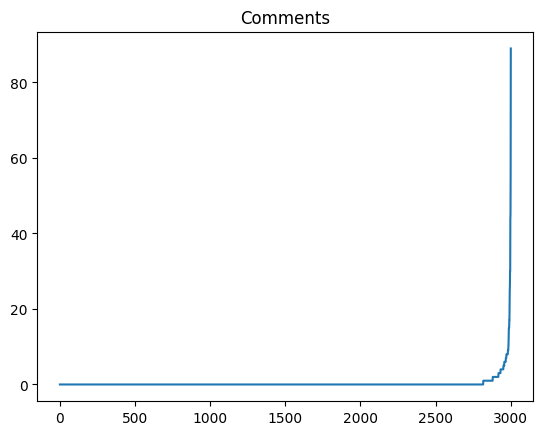

In [5]:
oy = data.comments.sort_values()
plt.title("Comments")
plt.plot(ox, oy)

In [6]:
oy = data.likes.sort_values()
len(oy[oy > 5])
# plt.title("likes")
# plt.xlim (2500, 2900)
# plt.plot(ox, oy)

350

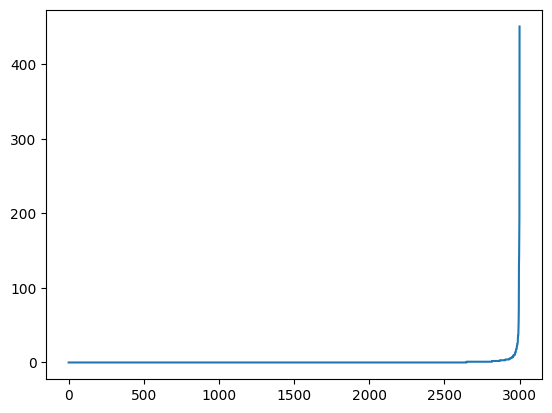

In [7]:
oy = data.reposts.sort_values()
plt.plot(ox, oy)

# Filter for zero-impact news (likes > 0 and not epmty)

In [8]:
not_empty_flags = [len(post) > 0 for post in data.posts]
len(not_empty_flags)
data = data[not_empty_flags & data.likes > 0]
data
# not_empty_flags
# [not_empty_flags & data.likes > 0]
# data[data.likes > 0]
# data.loc[3]

,date,id,owner_id,from_id,posts,comments,likes,reposts,views
1,2022-12-13 00:52:36,20,760241914,760241914,HEY!! \nFriends I think that maybe you don't h...,0,1,0,21.0
4,2022-12-13 00:21:36,8597,701896522,701896522,🍊🐸🔶 Investitori odustaju od kriptovaluta u re...,0,1,0,69.0
7,2022-12-13 00:15:35,27221,709928319,709928319,"DeCenter — блокчейн, биткоин, инвестиции:\n💬 С...",0,1,0,64.0
10,2022-12-13 00:06:03,46312,-172214536,-172214536,Эфир радиостанции от 12.12.2022 за 23:00\n\n≈ ...,0,1,0,136.0
23,2022-12-13 02:59:10,2428,291202702,291202702,ICP Price Prediction and All You Need to Know ...,0,1,0,9.0
...,...,...,...,...,...,...,...,...,...
2966,2022-12-13 22:00:01,488569,-145253784,-145253784,#manyawelt #MW_обсеры \n \n[id526519987|Богдан...,23,3,3,1640.0
2967,2022-12-13 22:00:01,203,-212484815,-212484815,"ПРОКАЧИВАЙ СЕБЯ, РАЗВИВАЙСЯ И ЗАРАБАТЫВАЙ ✨\n\...",0,1,0,15.0
2974,2022-12-13 23:53:01,122,746325268,746325268,В Камчатском крае окончено расследование уголо...,0,3,0,102.0
2985,2022-12-13 23:21:57,4887,284397361,284397361,Statista: количество криптовалют уменьшилось н...,0,1,1,66.0


# Delete all links

In [9]:
data['posts'] = data['posts'].apply(lambda x: re.sub(r'http\S+', '', x, flags=re.MULTILINE))
data['posts'] = data['posts'].apply(lambda x: re.sub(r'\[id.+?\]', '', x, flags=re.MULTILINE))
data['posts'] = data['posts'].apply(lambda x: re.sub(r'\[club.+?\]', '', x, flags=re.MULTILINE))
data
#id234234 & club1231
# data.loc[100].posts
# x = data.loc[1172].posts
# re.sub(r'http\S+', '', x)
# vk.com/id406209191 Татьяна Шушерова

,date,id,owner_id,from_id,posts,comments,likes,reposts,views
1,2022-12-13 00:52:36,20,760241914,760241914,HEY!! \nFriends I think that maybe you don't h...,0,1,0,21.0
4,2022-12-13 00:21:36,8597,701896522,701896522,🍊🐸🔶 Investitori odustaju od kriptovaluta u re...,0,1,0,69.0
7,2022-12-13 00:15:35,27221,709928319,709928319,"DeCenter — блокчейн, биткоин, инвестиции:\n💬 С...",0,1,0,64.0
10,2022-12-13 00:06:03,46312,-172214536,-172214536,Эфир радиостанции от 12.12.2022 за 23:00\n\n≈ ...,0,1,0,136.0
23,2022-12-13 02:59:10,2428,291202702,291202702,ICP Price Prediction and All You Need to Know ...,0,1,0,9.0
...,...,...,...,...,...,...,...,...,...
2966,2022-12-13 22:00:01,488569,-145253784,-145253784,"#manyawelt #MW_обсеры \n \n — правый либерал, ...",23,3,3,1640.0
2967,2022-12-13 22:00:01,203,-212484815,-212484815,"ПРОКАЧИВАЙ СЕБЯ, РАЗВИВАЙСЯ И ЗАРАБАТЫВАЙ ✨\n\...",0,1,0,15.0
2974,2022-12-13 23:53:01,122,746325268,746325268,В Камчатском крае окончено расследование уголо...,0,3,0,102.0
2985,2022-12-13 23:21:57,4887,284397361,284397361,Statista: количество криптовалют уменьшилось н...,0,1,1,66.0


In [10]:
#тут есть дичь напимер тупо список имён. Нужно построить графики для comments	likes	reposts	views
#и задать пороги

# Delete texts without cyrilic

In [11]:
not_cyrilic_flags = [bool(re.search('[а-яА-Я]', post)) for post in data.posts]
len(not_cyrilic_flags)
# not_cyrilic_flags
data = data[not_cyrilic_flags]
data
# [bool(re.search('[а-яА-Я]', post) for post in data.posts)]

,date,id,owner_id,from_id,posts,comments,likes,reposts,views
7,2022-12-13 00:15:35,27221,709928319,709928319,"DeCenter — блокчейн, биткоин, инвестиции:\n💬 С...",0,1,0,64.0
10,2022-12-13 00:06:03,46312,-172214536,-172214536,Эфир радиостанции от 12.12.2022 за 23:00\n\n≈ ...,0,1,0,136.0
88,2022-12-13 06:18:13,5772,-163574913,-163574913,Доброе утро #TRONICS !☕️ \n\nHе забудьте посмо...,0,1,0,94.0
112,2022-12-13 08:30:56,1057,-164878976,-164878976,CRYPTO BOT ПРЕДСТАВЛЯЕТ CRYPTO PAY 💱\n\nCrypto...,0,3,5,215.0
136,2022-12-13 09:06:31,14,-217663775,-217663775,Crypto News: \nЗАРАБОТОК на размещении \n микр...,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...
2966,2022-12-13 22:00:01,488569,-145253784,-145253784,"#manyawelt #MW_обсеры \n \n — правый либерал, ...",23,3,3,1640.0
2967,2022-12-13 22:00:01,203,-212484815,-212484815,"ПРОКАЧИВАЙ СЕБЯ, РАЗВИВАЙСЯ И ЗАРАБАТЫВАЙ ✨\n\...",0,1,0,15.0
2974,2022-12-13 23:53:01,122,746325268,746325268,В Камчатском крае окончено расследование уголо...,0,3,0,102.0
2985,2022-12-13 23:21:57,4887,284397361,284397361,Statista: количество криптовалют уменьшилось н...,0,1,1,66.0


# Drop duplicates posts

In [12]:
#deleting duplicates taking into account only text of posts
data = data.loc[data['posts'].drop_duplicates().index]
data.reset_index(drop=True, inplace=True)
data

,date,id,owner_id,from_id,posts,comments,likes,reposts,views
0,2022-12-13 00:15:35,27221,709928319,709928319,"DeCenter — блокчейн, биткоин, инвестиции:\n💬 С...",0,1,0,64.0
1,2022-12-13 00:06:03,46312,-172214536,-172214536,Эфир радиостанции от 12.12.2022 за 23:00\n\n≈ ...,0,1,0,136.0
2,2022-12-13 06:18:13,5772,-163574913,-163574913,Доброе утро #TRONICS !☕️ \n\nHе забудьте посмо...,0,1,0,94.0
3,2022-12-13 08:30:56,1057,-164878976,-164878976,CRYPTO BOT ПРЕДСТАВЛЯЕТ CRYPTO PAY 💱\n\nCrypto...,0,3,5,215.0
4,2022-12-13 09:06:31,14,-217663775,-217663775,Crypto News: \nЗАРАБОТОК на размещении \n микр...,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...
471,2022-12-13 22:00:01,488569,-145253784,-145253784,"#manyawelt #MW_обсеры \n \n — правый либерал, ...",23,3,3,1640.0
472,2022-12-13 22:00:01,203,-212484815,-212484815,"ПРОКАЧИВАЙ СЕБЯ, РАЗВИВАЙСЯ И ЗАРАБАТЫВАЙ ✨\n\...",0,1,0,15.0
473,2022-12-13 23:53:01,122,746325268,746325268,В Камчатском крае окончено расследование уголо...,0,3,0,102.0
474,2022-12-13 23:21:57,4887,284397361,284397361,Statista: количество криптовалют уменьшилось н...,0,1,1,66.0


### Checks for duplicates

In [13]:
# len(data['posts'].unique())
# pd.DataFrame({'dupl' : data.groupby( [ "posts"] ).size()}).reset_index().sort_values(by='dupl', ascending=False).head(5)
# data.sort_values(by='dupl', ascending=False)
# data

# Filter posts with big numbers of emojis

In [14]:
# print(data.loc[967].posts)
# print(data.loc[1434].posts)
# print(data.loc[1292].posts)

In [15]:
emoji_count = [len(re.findall(u'[\U0001f34a-\U0001f650]', x)) for x in data.posts]
data = data[[flag < 10 for flag in emoji_count]]
data.reset_index(drop=True, inplace=True)
data

,date,id,owner_id,from_id,posts,comments,likes,reposts,views
0,2022-12-13 00:06:03,46312,-172214536,-172214536,Эфир радиостанции от 12.12.2022 за 23:00\n\n≈ ...,0,1,0,136.0
1,2022-12-13 06:18:13,5772,-163574913,-163574913,Доброе утро #TRONICS !☕️ \n\nHе забудьте посмо...,0,1,0,94.0
2,2022-12-13 08:30:56,1057,-164878976,-164878976,CRYPTO BOT ПРЕДСТАВЛЯЕТ CRYPTO PAY 💱\n\nCrypto...,0,3,5,215.0
3,2022-12-13 09:06:31,14,-217663775,-217663775,Crypto News: \nЗАРАБОТОК на размещении \n микр...,0,1,0,2.0
4,2022-12-13 10:17:48,5776,-163574913,-163574913,📢ПРОШЛАЯ НЕДЕЛЯ В #BitTorrent\n✅#BTT получил н...,0,1,0,76.0
...,...,...,...,...,...,...,...,...,...
447,2022-12-13 22:06:10,307,-212345346,-212345346,Лучшая криптовалюта: 13 декабря \nДанные: Coin...,0,1,0,22.0
448,2022-12-13 22:00:01,488569,-145253784,-145253784,"#manyawelt #MW_обсеры \n \n — правый либерал, ...",23,3,3,1640.0
449,2022-12-13 23:53:01,122,746325268,746325268,В Камчатском крае окончено расследование уголо...,0,3,0,102.0
450,2022-12-13 23:21:57,4887,284397361,284397361,Statista: количество криптовалют уменьшилось н...,0,1,1,66.0


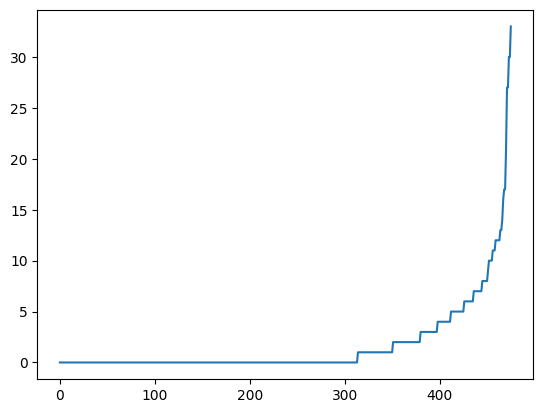

In [16]:
# data["emoji"]= emoji_count
emoji_count.sort()
plt.plot(range(len(emoji_count)), emoji_count)

# Import StopWords and Packets

In [17]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/danil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/danil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/danil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/danil/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
# female_names = """Анастасиа"""
# female_names = female_names.split()
# with open('female_names.txt', 'w') as file:
#     file.write('\n'.join(female_names))
# female_names

In [19]:
# # eng_stop_words=list(nltk.corpus.stopwords.words('russian'))
# # rus_stop_words=list(nltk.corpus.stopwords.words('english'))
# # stop_words = eng_stop_words + rus_stop_words

# with open('stop_words.txt', 'r') as file:
#     stop_words = file.read()
#     stop_words = stop_words.split()
    
# with open('female_names.txt', 'r') as file:
#     female_names = file.read()
#     female_names = female_names.split()
    
# with open('female_surnames.txt', 'r') as file:
#     female_surnames = file.read()
#     female_surnames = female_surnames.split()
    
# with open('male_names.txt', 'r') as file:
#     male_names = file.read()
#     male_names = male_names.split()
    
# with open('male_surnames.txt', 'r') as file:
#     male_surnames = file.read()
#     male_surnames = male_surnames.split()


# stop_words += female_names + female_surnames + male_names + male_surnames
# stop_words = set(stop_words)
# # len(stop_words)
# stop_words = [word.lower() for word in stop_words]
# stop_words
# with open('all_stop_words.txt', 'w') as file:
#     file.write('\n'.join(stop_words))

In [20]:
with open('all_stop_words.txt', 'r') as file:
    stop_words = file.read()
    stop_words = stop_words.split()

stop_words
len(stop_words)

1506

# Lemmatization

In [21]:
mystem = Mystem() 

In [22]:
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stop_words\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [23]:
data.posts = data.posts.apply(preprocess_text)

In [54]:
print(data.loc[1].posts)
data

добрый утро tronics ☕ ️ 
 hе забывать посмотреть последний новость нести tron 👇 👀 сообщение jennsanasie , « полный смысл »  кэролайн эллисон нанимать бывший чиновник secgov качество свой адвокат федеральный расследование отношение указывать потенциальный конфликт интерес подробность смотреть ссылка bit ly 3fhzdor


,date,id,owner_id,from_id,posts,comments,likes,reposts,views
0,2022-12-13 00:06:03,46312,-172214536,-172214536,эфир радиостанция 12.12 2022 23 00 ≈ 00 мина ...,0,1,0,136.0
1,2022-12-13 06:18:13,5772,-163574913,-163574913,добрый утро tronics ☕ ️ \n hе забывать посмотр...,0,1,0,94.0
2,2022-12-13 08:30:56,1057,-164878976,-164878976,crypto bot представлять crypto pay 💱 crypto pa...,0,3,5,215.0
3,2022-12-13 09:06:31,14,-217663775,-217663775,crypto news заработок размещение микро новость...,0,1,0,2.0
4,2022-12-13 10:17:48,5776,-163574913,-163574913,📢 прошлый неделя bittorrent ✅ btt получать бол...,0,1,0,76.0
...,...,...,...,...,...,...,...,...,...
447,2022-12-13 22:06:10,307,-212345346,-212345346,хороший криптовалюта 13 декабрь данные coingec...,0,1,0,22.0
448,2022-12-13 22:00:01,488569,-145253784,-145253784,manyawelt mw обсера — правый либерал правосл...,23,3,3,1640.0
449,2022-12-13 23:53:01,122,746325268,746325268,камчатский край оканчивать расследование уголо...,0,3,0,102.0
450,2022-12-13 23:21:57,4887,284397361,284397361,statista количество криптовалюта уменьшаться 1...,0,1,1,66.0


In [55]:
data.to_csv('cleaned_data')

# Clean lemat

In [25]:
# def clean_text(headline):
#     le=WordNetLemmatizer()
#     word_tokens=word_tokenize(headline)
#     tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>2]
#     cleaned_text=" ".join(tokens)
# #     print(headline, '\n')
#     return cleaned_text

In [26]:
# data['headline_cleaned_text']=data['posts'].apply(clean_text)

In [27]:
# df = data
# df

In [28]:
# df.drop(['posts'],axis=1,inplace=True)
data.head()

,date,id,owner_id,from_id,posts,comments,likes,reposts,views
0,2022-12-13 00:06:03,46312,-172214536,-172214536,эфир радиостанция 12.12 2022 23 00 ≈ 00 мина ...,0,1,0,136.0
1,2022-12-13 06:18:13,5772,-163574913,-163574913,добрый утро tronics ☕ ️ \n hе забывать посмотр...,0,1,0,94.0
2,2022-12-13 08:30:56,1057,-164878976,-164878976,crypto bot представлять crypto pay 💱 crypto pa...,0,3,5,215.0
3,2022-12-13 09:06:31,14,-217663775,-217663775,crypto news заработок размещение микро новость...,0,1,0,2.0
4,2022-12-13 10:17:48,5776,-163574913,-163574913,📢 прошлый неделя bittorrent ✅ btt получать бол...,0,1,0,76.0


In [29]:
# texts = df.groupby('headline_cleaned_text')['headline_cleaned_text'].count().reset_index(name='len')
# texts.sort_values('len')

In [30]:
data.describe()

,id,owner_id,from_id,comments,likes,reposts,views
count,4.520000e+02,4.520000e+02,4.520000e+02,452.000000,452.000000,452.000000,452.000000
mean,7.723213e+04,7.665912e+07,7.665912e+07,1.150442,11.504425,3.610619,1026.064159
std,6.526523e+05,2.959524e+08,2.959524e+08,5.805374,64.639217,26.314214,8137.197390
min,1.000000e+00,-2.177414e+08,-2.177414e+08,0.000000,1.000000,0.000000,1.000000
25%,1.192500e+02,-1.656509e+08,-1.656509e+08,0.000000,1.000000,0.000000,29.000000
50%,1.612000e+03,-2.375186e+07,-2.375186e+07,0.000000,1.000000,0.000000,64.500000
75%,1.162775e+04,3.264628e+08,3.264628e+08,0.000000,7.000000,1.000000,278.250000
max,1.218826e+07,7.695452e+08,7.695452e+08,89.000000,1289.000000,451.000000,166266.000000


## Vectorizing usung TfidfVectorizer

In [31]:
#max_features - MAX vocabulare for comment
#TF-IDF. Эта аббревиатура означает "term frequency — inverse document frequency"
#каждая строка соответствует документу
#каждый столбец соответствует слову
vect = TfidfVectorizer(stop_words=stop_words,max_features=100)
vect_text=vect.fit_transform(data['posts'])

In [32]:
#список всех рассматриваемых слов (100 самых встречаемых)
vect.vocabulary_

{'15': 0,
 'свой': 79,
 'криптовалюта': 35,
 'счет': 91,
 'получать': 63,
 'com': 1,
 'заработок': 19,
 'сша': 92,
 'средство': 85,
 'статья': 88,
 'самый': 78,
 'курсы': 37,
 'обучение': 53,
 'новый': 50,
 'информация': 27,
 'становиться': 87,
 'vk': 2,
 'инструмент': 26,
 'деньги': 13,
 'работа': 72,
 'рынок': 77,
 'вывод': 9,
 'машина': 45,
 'зона': 23,
 'компания': 31,
 'цена': 98,
 'программа': 70,
 'подарок': 61,
 'навык': 48,
 'часть': 99,
 'участник': 97,
 'структура': 90,
 'биржа': 4,
 'размер': 74,
 'крипта': 34,
 'ребенок': 75,
 'семья': 81,
 'земля': 21,
 'остаток': 56,
 'гора': 12,
 'сказка': 83,
 'поиск': 62,
 'серия': 82,
 'маркетплейс': 43,
 'план': 58,
 'институт': 25,
 'получение': 64,
 'погода': 60,
 'газета': 11,
 'одежда': 55,
 'сезон': 80,
 'спорт': 84,
 'май': 42,
 'прогноз': 69,
 'алена': 3,
 'кухня': 38,
 'развод': 73,
 'мошенник': 46,
 'звезда': 20,
 'владелец': 7,
 'партия': 57,
 'успех': 95,
 'пространство': 71,
 'ставка': 86,
 'страна': 89,
 'лето': 41,
 'к

In [33]:
# df['headline_cleaned_text'][1]

In [34]:
print(vect_text.shape)
# print(vect_text)
# vect_text

(452, 100)


In [35]:
#all stored values ~ 2042*100
vect_text.getnnz()

10006

In [36]:
#inverse document frequency for every word
#лог(число всех документов / число документов со словом)
idf=vect.idf_
idf.shape
idf

array([2.28757839, 2.44306329, 2.46193178, 2.57259734, 3.03835468,
       2.55154393, 2.57259734, 2.44306329, 2.52077228, 2.30370777,
       2.56201523, 2.52077228, 2.54118115, 2.81182703, 2.57259734,
       2.57259734, 2.54118115, 2.58329263, 2.55154393, 2.33676863,
       2.56201523, 2.53092465, 2.55154393, 2.49091931, 2.55154393,
       2.53092465, 2.40636192, 2.27961022, 2.58329263, 2.58329263,
       2.44306329, 3.00501826, 2.55154393, 2.55154393, 2.62725576,
       1.3382398 , 2.56201523, 2.53092465, 2.56201523, 2.57259734,
       2.57259734, 2.54118115, 2.50077161, 2.50077161, 2.53092465,
       2.47150123, 2.48116314, 2.58329263, 2.51072194, 2.58329263,
       2.73386549, 2.54118115, 2.55154393, 2.4337609 , 2.58329263,
       2.51072194, 2.53092465, 2.52077228, 2.38850431, 2.56201523,
       2.55154393, 2.50077161, 2.44306329, 2.64998401, 2.46193178,
       2.53092465, 2.56201523, 2.57259734, 2.55154393, 2.42454424,
       2.37969368, 2.53092465, 2.18141819, 2.54118115, 2.40636

# Applying LDA

In [37]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [38]:
#Матрица распределения текстов по темам
lda_top=lda_model.fit_transform(vect_text)

In [39]:
lda_model.components_.shape
lda_top.shape
lda_top[0]

array([0.05000303, 0.54996515, 0.0500037 , 0.05000199, 0.0500023 ,
       0.05000219, 0.05000543, 0.05000442, 0.05000257, 0.05000922])

In [40]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum) 

0.9999999999999998


In [41]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  5.000302700542707 %
Topic  1 :  54.996515177541504 %
Topic  2 :  5.000369764791727 %
Topic  3 :  5.000199152376875 %
Topic  4 :  5.000230004619215 %
Topic  5 :  5.000219308910438 %
Topic  6 :  5.0005432573676885 %
Topic  7 :  5.000441896222585 %
Topic  8 :  5.0002566996128515 %
Topic  9 :  5.0009220380144095 %


In [42]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
биржа криптовалюта деньги крипта работа свой прогноз инструмент закрытый становиться 

Topic 1: 
рынок сша криптовалюта крипта свой средство биржа 15 цена компания 

Topic 2: 
криптовалюта свой мошенник программа информация новый часть сша рынок участник 

Topic 3: 
vk com свой криптовалюта самый новый заработок обучение крипта деньги 

Topic 4: 
деньги новый ребенок получать самый становиться биржа инструмент криптовалюта свой 

Topic 5: 
крипта статья деньги курсы цена свой становиться получать владелец структура 

Topic 6: 
компания криптовалюта рынок получать биржа погода цена размер крипта работа 

Topic 7: 
com vk получать свой крипта криптовалюта зона программа участник матч 

Topic 8: 
криптовалюта цена становиться крипта новый статья свой рынок получать деньги 

Topic 9: 
свой получать криптовалюта становиться новый компания деньги программа самый вывод 



In [43]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  5.0004071985693805 %
Topic  1 :  5.000768310400211 %
Topic  2 :  5.000254964268856 %
Topic  3 :  5.001113586612995 %
Topic  4 :  5.000221687040842 %
Topic  5 :  5.000181723040482 %
Topic  6 :  5.000177275497182 %
Topic  7 :  5.000481617171838 %
Topic  8 :  5.0004388281593855 %
Topic  9 :  54.99595480923883 %


In [44]:
# df = df.reset_index(drop=True)
# df[500]
# df

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

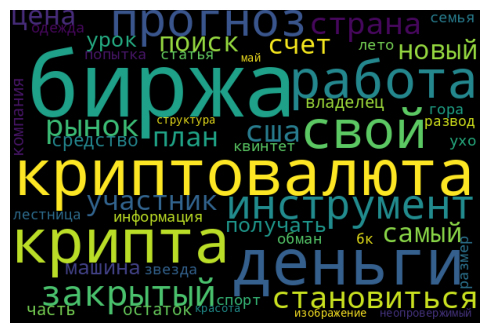

In [46]:
# topic 0
draw_word_cloud(0)

In [47]:
#plotting tools
import pyLDAvis
import pyLDAvis.gensim

In [48]:
lda = lda_model
corpus_lda = data['posts']
dictionary = list(vect.vocabulary_.keys())
len(corpus_lda)
corpus_lda

0      эфир радиостанция 12.12 2022 23 00 ≈ 00 мина  ...
1      добрый утро tronics ☕ ️ \n hе забывать посмотр...
2      crypto bot представлять crypto pay 💱 crypto pa...
3      crypto news заработок размещение микро новость...
4      📢 прошлый неделя bittorrent ✅ btt получать бол...
                             ...                        
447    хороший криптовалюта 13 декабрь данные coingec...
448    manyawelt mw обсера  —  правый либерал правосл...
449    камчатский край оканчивать расследование уголо...
450    statista количество криптовалюта уменьшаться 1...
451    дело добровольный депутат кардинальный передел...
Name: posts, Length: 452, dtype: object

In [49]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

ValueError: not enough values to unpack (expected 2, got 1)